In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
actions = ['good', 'more', 'when', 'hot', 'cold', 'apron', 'connect']

data = np.concatenate([
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_good.npy'),
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_more.npy'),
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_when.npy'),
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_hot.npy'),
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_cold.npy'),
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_apron.npy'),
    np.load(r'C:\Users\compi\OneDrive\문서\Code\python\deep_daiv\openseminar\dataset\seq_connect.npy')
], axis=0)

data.shape

(11709, 30, 58)

In [6]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(11709, 30, 57)
(11709,)


In [7]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(11709, 7)

In [22]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(8196, 30, 57) (8196, 7)
(3513, 30, 57) (3513, 7)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 64)             │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,927 (132.53 KB)

 Trainable params: 33,735 (131.78 KB)

 Non-trainable params: 192 (768.00 B)

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
255/257 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4938 - loss: 1.4324
Epoch 1: val_acc improved from -inf to 0.30828, saving model to models/model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - acc: 0.4940 - loss: 1.4317 - val_acc: 0.3083 - val_loss: 2.2032 - learning_rate: 0.0010
Epoch 2/100
254/257 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4661 - loss: 1.4347
Epoch 2: val_acc improved from 0.30828 to 0.43154, saving model to models/model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.4670 - loss: 1.4323 - val_acc: 0.4315 - val_loss: 1.5088 - learning_rate: 0.0010
Epoch 3/100
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6134 - loss: 1.0155
Epoch 3: val_acc improved from 0.43154 to 0.58952, saving model to models/model.keras
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.6137 - loss: 1.0149 - val_acc: 0.5895 - val_loss: 1.3632 - learning_rate: 0.0010
Epoch 4/100
255/257 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6939 - loss: 0.8582
Epoch 4: val_acc improv

KeyboardInterrupt: 

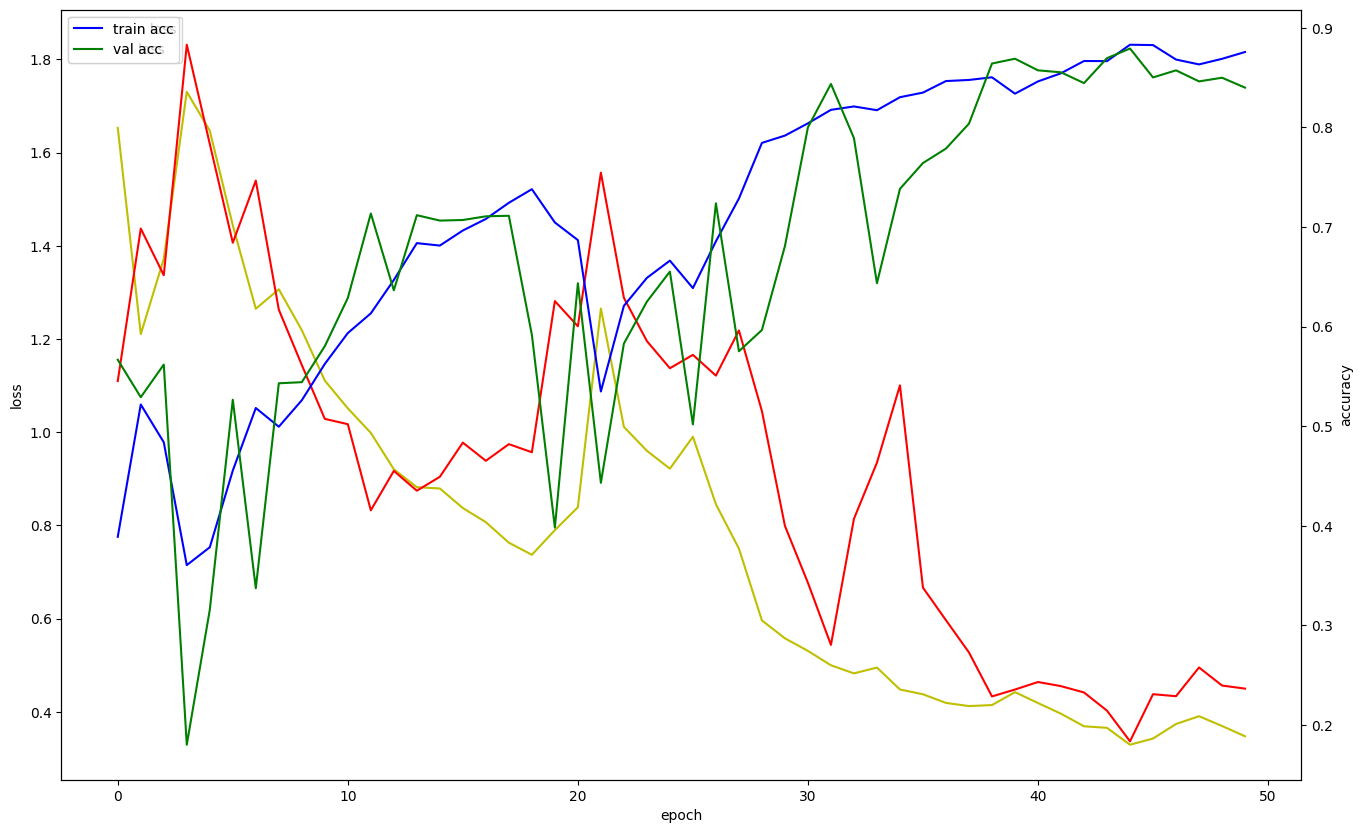

In [30]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[[1407,    2],
        [  12,  163]],

       [[1403,    0],
        [   2,  179]],

       [[1239,    0],
        [   0,  345]],

       [[1387,    0],
        [   5,  192]],

       [[1218,   10],
        [   0,  356]],

       [[1428,    5],
        [   0,  151]],

       [[1402,    3],
        [   1,  178]]], dtype=int64)